In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

 Inflated is true if
            (color=yellow and size = small) or (age=adult and act=stretch)

Number of attributes: 4

Number of Instances: 16

Attribute Information: (Classes Inflated T or F)

---
   Color:             yellow, purple
>
   size:             large, small
>
   act:               stretch, dip
>
   age:               adult, child
>
   inflated:          T, F

In [35]:
# Read the CSV file
dataset = pd.read_csv("/content/drive/MyDrive/balloons/yellow-small+adult-stretch.csv")
dataset.head(16)

,COLOR,SIZE,ACT,AGE,INFLATED
0,YELLOW,SMALL,STRETCH,ADULT,T
1,YELLOW,SMALL,STRETCH,CHILD,T
2,YELLOW,SMALL,DIP,ADULT,T
3,YELLOW,SMALL,DIP,CHILD,T
4,YELLOW,LARGE,STRETCH,ADULT,T
5,YELLOW,LARGE,STRETCH,CHILD,F
6,YELLOW,LARGE,DIP,ADULT,F
7,YELLOW,LARGE,DIP,CHILD,F
8,PURPLE,SMALL,STRETCH,ADULT,T
9,PURPLE,SMALL,STRETCH,CHILD,F


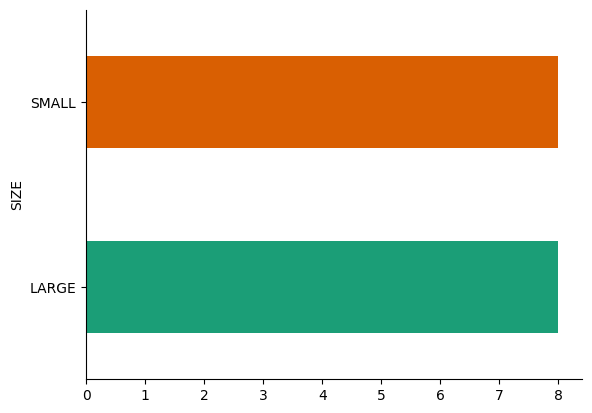

In [3]:
# @title SIZE

from matplotlib import pyplot as plt
import seaborn as sns
dataset.groupby('SIZE').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

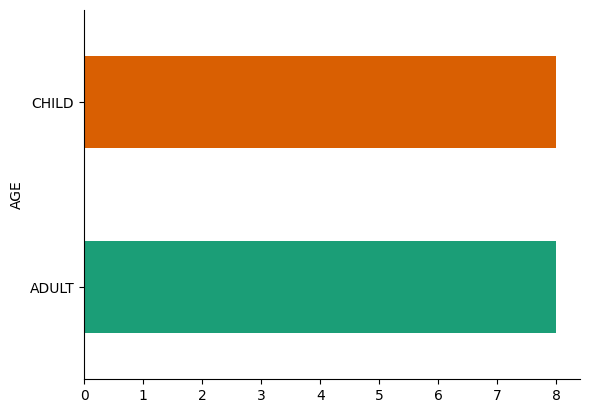

In [24]:
# @title AGE

from matplotlib import pyplot as plt
import seaborn as sns
dataset.groupby('AGE').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [40]:
df = pd.get_dummies(dataset, columns=['COLOR', 'SIZE', 'ACT', 'AGE'])

df['INFLATED'] = df['INFLATED'].map({'T': 1, 'F': 0})

X = df.drop('INFLATED', axis=1)
y = df['INFLATED']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

classifier1 = RandomForestClassifier()
classifier2 = KNeighborsClassifier()

classifiers = [classifier1, classifier2]
labels = ['Random Forest', 'KNN']

print("Five-fold cross-validation:\n")

for clf, label in zip(classifiers, labels):
    scores = cross_val_score(clf, X, y, cv=5)
    print(f'{label} cross-validation accuracy: {scores.mean():.2f} ± {scores.std():.2f}')

Five-fold cross-validation:

Random Forest cross-validation accuracy: 0.68 ± 0.30
KNN cross-validation accuracy: 0.75 ± 0.25
